<a href="https://colab.research.google.com/github/emadaghajanzadeh/sklearn_pycon2015/blob/master/paper2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span style="color:purple;font-size:3em;">**Mnist-convl-implement like paper**
</span>

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Activation,Conv2D, MaxPooling2D, Flatten,BatchNormalization,Conv1D,MaxPooling1D,Dropout , Lambda
from keras import initializers

image_size = 28
num_channels = 0
num_features = image_size * image_size 
num_classes = 10

num_train = 60000


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os , pickle
from google.colab import drive
drive.mount('/content/drive')

def load_cifar10_batch(filename):
  # "load signle batch from CIFAR10"
    with open(filename , 'rb') as f  : 
     datadict = pickle.load(f , encoding='bytes')
     X = datadict[b'data']
     Y = datadict[b'labels']
     X = X.reshape(10000 , 3 , 32 , 32)
     X = X.transpose(0 , 2 , 3 , 1).astype('float')
     Y = np.array(Y)
     return X , Y

def load_cifar10(dir):
  xs = []
  ys = []
  for i in range(1 , 6):
    filenamev = os.path.join(dir , 'data_batch_%d' %i)
    X , Y = load_cifar10_batch(filenamev)
    xs.append(X)
    ys.append(Y)

  Xtr = np.concatenate(xs)
  Ytr = np.concatenate(ys)
  del X , Y

  Xte , Yte  = load_cifar10_batch(os.path.join(dir , 'test_batch'))
  return Xtr , Ytr , Xte , Yte

X_train , y_train , X_test , y_test = load_cifar10('./drive/My Drive/Colab Notebooks/datasets/cifar-10-batches-py')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
(X_train, y_train), (X_test, y_test)
print('Train data shape: {}'.format(X_train.shape))
print('Test  data shape: {}'.format(X_test.shape))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape)
print(X_train.shape[1:])

Train data shape: (50000, 32, 32, 3)
Test  data shape: (10000, 32, 32, 3)
(50000, 32, 32, 3)
(32, 32, 3)


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)

print(y_train.shape)
print(y_test.shape)
#########   !!!
# print((num_features,))


(50000, 10)
(10000, 10)


In [ ]:
def create_cnn(model_name):
    model = Sequential()
    if(model_name=="without_dropout"):
        #######################################  without_dropout  ##################   
        # Conv Block 1 
        model.add(Conv2D(6, kernel_size=(5 , 5), padding='same', input_shape=X_train.shape[1:], activation='relu', kernel_initializer=initializers.RandomNormal(stddev=0.01),
        bias_initializer=initializers.Zeros())) 
        model.add(MaxPooling2D(pool_size=(2,2),strides=2))
        # Conv Block 2
        model.add(Conv2D(12,kernel_size=(5 ,5 ), padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(2 , 2),strides=2))
        # Classifier
        model.add(Flatten())                                                         
        model.add(Dense(1000, activation='relu'))
        model.add(Dense(num_classes, activation='softmax'))
        
####################################################### max_pooling##################   
   
    elif(model_name=="max_pooling"):
        # Conv Block 1 
        model.add(Conv2D(6, kernel_size=(5 , 5), padding='same', input_shape=X_train.shape[1:], activation='relu', kernel_initializer=initializers.RandomNormal(stddev=0.01),
        bias_initializer=initializers.Zeros())) 
        model.add(Dropout(0.5))
        model.add(MaxPooling2D(pool_size=(2,2),strides=2))
       
        # Conv Block 2
        model.add(Conv2D(12,kernel_size=(5,5), padding='same', activation='relu'))
        model.add(Dropout(0.5))
        model.add(MaxPooling2D(pool_size=(2,2),strides=2))
        
        # Classifier
        model.add(Flatten())
        model.add(Dense(1000, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(num_classes, activation='softmax'))
    
    elif(model_name=="scaled_max_pooling"):
        # Conv Block 1 
        model.add(Conv2D(6, kernel_size=(5,5), padding='same', input_shape=X_train.shape[1:], activation='relu', kernel_initializer=initializers.RandomNormal(stddev=0.01),
        bias_initializer=initializers.Zeros())) 
        model.add(Dropout(0.5))
        model.add(MaxPooling2D(pool_size=(2,2),strides=2))
        model.add(Lambda(lambda x: x * 0.5))
       
        # Conv Block 2
        model.add(Conv2D(12,kernel_size=(5,5), padding='same', activation='relu'))
        model.add(Dropout(0.5))
        model.add(MaxPooling2D(pool_size=(2,2),strides=2))
        model.add(Lambda(lambda x: x * 0.5))
        
        # Classifier
        model.add(Flatten())
        model.add(Dense(1000, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(num_classes, activation='softmax'))

    return model



#print model
# model.summary()

In [ ]:
model = create_cnn("without_dropout")
#optimizer = keras.optimizers.SGD(learning_rate=0.001,momentum=0.95)
# step = tf.Variable(0, trainable=False)

# boundaries = [20000, 40000]
# values = [0.1, 0.01, 0.001]
# learning_rate_fn= tf.keras.optimizers.schedules.PiecewiseConstantDecay(
#     boundaries, values)

# # Later, whenever we perform an optimization step, we pass in the step.
# learning_rate = learning_rate_fn(step)
optimizer = keras.optimizers.SGD(learning_rate = 0.001 , momentum=0.95)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# history_without_dropout=model.fit(X_train[:50000 ], y_train[:50000 , :],
#           batch_size=100,
#           epochs=15
#           ,validation_data=(X_train[50000: , :], X_train[50000: , :]))

history_without_dropout = model.fit(X_train , y_train , batch_size = 100 , epochs = 55 , validation_split=1/6)
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

          
          

Epoch 1/55


KeyboardInterrupt: ignored

In [ ]:
model = create_cnn("max_pooling")
#optimizer = keras.optimizers.SGD(learning_rate=0.001,momentum=0.95)
# step = tf.Variable(0, trainable=False)

# boundaries = [20000, 40000]
# values = [0.1, 0.01, 0.001]
# learning_rate_fn= tf.keras.optimizers.schedules.PiecewiseConstantDecay(
#     boundaries, values)

# # Later, whenever we perform an optimization step, we pass in the step.
# learning_rate = learning_rate_fn(step)
optimizer = keras.optimizers.SGD(learning_rate = 0.001 , momentum=0.95)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# history_without_dropout=model.fit(X_train[:50000 ], y_train[:50000 , :],
#           batch_size=100,
#           epochs=15
#           ,validation_data=(X_train[50000: , :], X_train[50000: , :]))

history_max_pooling = model.fit(X_train , y_train , batch_size = 100 , epochs = 55 , validation_split=1/6)
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/55
417/417 [==============================] - 2s 5ms/step - loss: 1.8347 - accuracy: 0.3298 - val_loss: 1.8507 - val_accuracy: 0.3925
Epoch 2/55
417/417 [==============================] - 2s 4ms/step - loss: 1.5416 - accuracy: 0.4463 - val_loss: 1.7663 - val_accuracy: 0.4114
Epoch 3/55
417/417 [==============================] - 2s 4ms/step - loss: 1.4529 - accuracy: 0.4778 - val_loss: 1.7292 - val_accuracy: 0.3962
Epoch 4/55
417/417 [==============================] - 2s 4ms/step - loss: 1.3909 - accuracy: 0.5027 - val_loss: 1.7618 - val_accuracy: 0.3884
Epoch 5/55
417/417 [==============================] - 2s 4ms/step - loss: 1.3361 - accuracy: 0.5261 - val_loss: 1.6978 - val_accuracy: 0.3987
Epoch 6/55
417/417 [==============================] - 2s 4ms/step - loss: 1.2895 - accuracy: 0.5408 - val_loss: 1.6167 - val_accuracy: 0.4422
Epoch 7/55
417/417 [==============================] - 2s 4ms/step - loss: 1.2514 - accuracy: 0.5561 - val_loss: 1.6728 - val_accuracy: 0.4050
Epoch 

In [ ]:
model = create_cnn("scaled_max_pooling")
#optimizer = keras.optimizers.SGD(learning_rate=0.001,momentum=0.95)
# step = tf.Variable(0, trainable=False)

# boundaries = [20000, 40000]
# values = [0.1, 0.01, 0.001]
# learning_rate_fn= tf.keras.optimizers.schedules.PiecewiseConstantDecay(
#     boundaries, values)

# # Later, whenever we perform an optimization step, we pass in the step.
# learning_rate = learning_rate_fn(step)
optimizer = keras.optimizers.SGD(learning_rate = 0.001 , momentum=0.95)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# history_without_dropout=model.fit(X_train[:50000 ], y_train[:50000 , :],
#           batch_size=100,
#           epochs=15
#           ,validation_data=(X_train[50000: , :], X_train[50000: , :]))

history_scaled_max_pooling = model.fit(X_train , y_train , batch_size = 100 , epochs = 55 , validation_split=1/6)
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/55
417/417 [==============================] - 5s 11ms/step - loss: 1.8058 - accuracy: 0.3394 - val_loss: 1.9754 - val_accuracy: 0.2642
Epoch 2/55
417/417 [==============================] - 4s 10ms/step - loss: 1.5899 - accuracy: 0.4220 - val_loss: 1.9684 - val_accuracy: 0.2846
Epoch 3/55
417/417 [==============================] - 4s 10ms/step - loss: 1.5132 - accuracy: 0.4514 - val_loss: 1.9234 - val_accuracy: 0.2802
Epoch 4/55
417/417 [==============================] - 4s 10ms/step - loss: 1.4555 - accuracy: 0.4756 - val_loss: 1.9123 - val_accuracy: 0.2819
Epoch 5/55
417/417 [==============================] - 4s 10ms/step - loss: 1.4103 - accuracy: 0.4918 - val_loss: 2.0906 - val_accuracy: 0.2307
Epoch 6/55
417/417 [==============================] - 4s 10ms/step - loss: 1.3647 - accuracy: 0.5075 - val_loss: 2.0084 - val_accuracy: 0.2647
Epoch 7/55
417/417 [==============================] - 4s 10ms/step - loss: 1.3284 - accuracy: 0.5252 - val_loss: 1.8406 - val_accuracy: 0.3164

In [ ]:

plt.plot(history_without_dropout.history['loss'])
# plt.plot(history_without_dropout.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train_without_loss'])
plt.plot(history_scaled_max_pooling.history['loss'])
plt.plot(history_max_pooling.history['loss'])
# plt.plot(history_max_pooling.history['val_loss'])
plt.legend(['train_without_dropout' , 'train_scaled_max_pooling' , 'train_max_pooling'])
plt.show()

# plt.plot(history_without_dropout.history['loss'])
plt.plot(history_without_dropout.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['val_without_loss'])

# plt.plot(history_max_pooling.history['loss'])
plt.plot(history_scaled_max_pooling.history['val_loss'])
plt.plot(history_max_pooling.history['val_loss'])
plt.legend(['val_without_dropout' ,"val_scaled_max_pooling", 'val_max_pooling'])
plt.show()




plt.plot(history_without_dropout.history['loss'])
plt.plot(history_without_dropout.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("without drop out")
plt.legend(['train_loss' , 'validation_loss'])
plt.show()

plt.plot(history_max_pooling.history['loss'])
plt.plot(history_max_pooling.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("max pooling")
plt.legend(['train_loss' , 'validation_loss'])
plt.show()


NameError: ignored

In [ ]:
model.evaluate(X_test, y_test, batch_size=250)

<span style="color:purple;font-size:3em;">**Cfar10-convl-implement like paper**
</span>

In [ ]:

from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import initializers
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import  Dense,Activation,Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout
image_size = 32
num_channels = 3
num_features = image_size * image_size * num_channels
num_classes = 10

num_train = 49000

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('Train data shape: {}'.format(X_train.shape))
print('Test  data shape: {}'.format(X_test.shape))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape)
print(X_train.shape[1:])

170500096/170498071 [==============================] - 3s 0us/step
Train data shape: (50000, 32, 32, 3)
Test  data shape: (10000, 32, 32, 3)
(50000, 32, 32, 3)
(32, 32, 3)


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)

print(y_train.shape)
print(y_test.shape)
#########   !!!
print((num_features,))


(50000, 10)
(10000, 10)
(3072,)


In [ ]:
from keras import backend as K 
from keras.layers import Layer
import tensorflow as tf
import tensorflow.compat.v1 as tf
import time
class OptimizedDroupout(Layer): 
   def __init__(self, keep_prob, **kwargs): 
      self.keep_prob = keep_prob
      super(OptimizedDroupout, self).__init__(**kwargs) 

   def build(self, input_shape): 
      super(OptimizedDroupout, self).build(input_shape) # Be sure to call this at the end 

   def call(self, input_data): 
      mean =  tf.reduce_mean(input_data, axis=-1, keepdims=True)
      tf.print(input_data)
      tf.print(mean)
      # time.sleep(30)
      # with tf.Session() as sess:  print(mean.eval())       # print("emad")
      return input_data
      # return K.dot(input_data, self.kernel) 
   


In [ ]:
def create_cnn2(model_name):
    model = Sequential()
    if(model_name=="without_dropout"):
        #######################################  without_dropout  ##################   
            
        # Conv Block 1 
        model.add(Conv2D(96, kernel_size=(5,5), padding='same', input_shape=X_train.shape[1:], activation='relu', kernel_initializer=initializers.RandomNormal(stddev=0.01),
        bias_initializer=initializers.Zeros()))
        model.add(MaxPooling2D(pool_size=(3,3),strides=2))

        # Conv Block 2
        model.add(Conv2D(128,kernel_size=(3,3), padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(3,3),strides=2))

        # Conv Block 3
        model.add(Conv2D(256,kernel_size=(3,3), padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(3,3),strides=2))

        # Classifier
        model.add(Flatten())
        model.add(Dense(2000, activation='relu'))
        model.add(Dense(2000, activation='relu'))
        model.add(Dense(num_classes, activation='softmax'))
        
       ####################################################### max_pooling##################   
   
    elif(model_name=="max_pooling"):
                              
        # Conv Block 1 
        model.add(Conv2D(96, kernel_size=(5,5), padding='same', input_shape=X_train.shape[1:], activation='relu', kernel_initializer=initializers.RandomNormal(stddev=0.01),
        bias_initializer=initializers.Zeros()))
        model.add(Dropout(0.7))
        model.add(MaxPooling2D(pool_size=(3,3),strides=2))

        # Conv Block 2
        model.add(Conv2D(128,kernel_size=(3,3), padding='same', activation='relu'))
        model.add(Dropout(0.5))
        model.add(MaxPooling2D(pool_size=(3,3),strides=2))
        
        # Conv Block 3
        model.add(Conv2D(256,kernel_size=(3,3), padding='same', activation='relu'))
        model.add(Dropout(0.3))
        model.add(MaxPooling2D(pool_size=(3,3),strides=2))
       
        # Classifier
        model.add(Flatten())
        model.add(Dense(2000, activation='relu'))
        model.add(Dense(2000, activation='relu'))
        model.add(Dense(num_classes, activation='softmax'))
         ####################################################### max_pooling##################   

    elif(model_name=="optimized_dropout"):

        # Conv Block 1 
        model.add(Conv2D(96, kernel_size=(5,5), padding='same', input_shape=X_train.shape[1:], activation='relu', kernel_initializer=initializers.RandomNormal(stddev=0.01),
        bias_initializer=initializers.Zeros()))
        model.add(Dropout(0.7))
        model.add(OptimizedDroupout(0.7))
        model.add(MaxPooling2D(pool_size=(3,3),strides=2))

        # Conv Block 2
        model.add(Conv2D(128,kernel_size=(3,3), padding='same', activation='relu'))
        model.add(Dropout(0.5))
        model.add(MaxPooling2D(pool_size=(3,3),strides=2))
        
        # Conv Block 3
        model.add(Conv2D(256,kernel_size=(3,3), padding='same', activation='relu'))
        model.add(Dropout(0.3))
        model.add(MaxPooling2D(pool_size=(3,3),strides=2))
       
        # Classifier
        model.add(Flatten())
        model.add(Dense(2000, activation='relu'))
        model.add(Dense(2000, activation='relu'))
        model.add(Dense(num_classes, activation='softmax'))
        
    return model



#print model
# model.summary()

In [ ]:
model = create_cnn2("optimized_dropout")
#optimizer = keras.optimizers.SGD(learning_rate=0.001,momentum=0.95)
'''step = tf.Variable(0, trainable=False)

boundaries = [20000, 40000]
values = [0.1, 0.01, 0.001]
learning_rate_fn= tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries, values)
'''
#optimizer = keras.optimizers.SGD(learning_rate=0.001,momentum=0.95)
optimizer = keras.optimizers.SGD(learning_rate=0.01 , momentum = 0.95)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history_max_pooling=model.fit(X_train, y_train,
          batch_size=100,
          epochs=5
          ,validation_data=(X_test, y_test))
          

In [ ]:
model = create_cnn2("max_pooling")
#optimizer = keras.optimizers.SGD(learning_rate=0.001,momentum=0.95)
optimizer = keras.optimizers.SGD(learning_rate=0.01 , momentum = 0.95)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history_max_pooling=model.fit(X_train, y_train,
          batch_size=100,
          epochs=5
          ,validation_data=(X_test, y_test))

Epoch 1/5
500/500 [==============================] - 9s 17ms/step - loss: 1.8022 - accuracy: 0.3376 - val_loss: 2.2430 - val_accuracy: 0.1890
Epoch 2/5
500/500 [==============================] - 8s 17ms/step - loss: 1.4592 - accuracy: 0.4738 - val_loss: 2.1977 - val_accuracy: 0.1748
Epoch 3/5
500/500 [==============================] - 8s 17ms/step - loss: 1.3234 - accuracy: 0.5248 - val_loss: 2.1771 - val_accuracy: 0.2538
Epoch 4/5
500/500 [==============================] - 8s 17ms/step - loss: 1.2320 - accuracy: 0.5632 - val_loss: 2.1649 - val_accuracy: 0.2400
Epoch 5/5
500/500 [==============================] - 8s 17ms/step - loss: 1.1509 - accuracy: 0.5909 - val_loss: 2.0054 - val_accuracy: 0.3119


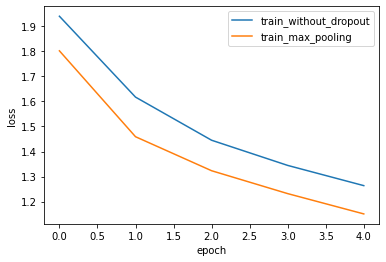

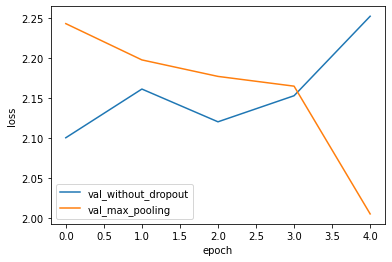

In [ ]:

plt.plot(history_optimized_dropout.history['loss'])
# plt.plot(history_without_dropout.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train_without_loss'])

plt.plot(history_max_pooling.history['loss'])
# plt.plot(history_max_pooling.history['val_loss'])
plt.legend(['train_without_dropout' , 'train_max_pooling'])
plt.show()

# plt.plot(history_without_dropout.history['loss'])
plt.plot(history_optimized_dropout.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['val_without_loss'])

# plt.plot(history_max_pooling.history['loss'])
plt.plot(history_max_pooling.history['val_loss'])
plt.legend(['val_without_dropout' , 'val_max_pooling'])

In [ ]:
model.evaluate(X_test, y_test, batch_size=250)

10000/10000 [==============================] - 1s 73us/step


[2.3026821196079252, 0.10000000149011612]